In [1]:
from scrape import get_results
from scrape import get_data
from scrape import grab_years_played
from scrape import revised_run
from scrape import train_test
from scrape import read_adps
from scrape import summarize_proj

2022 WR Projections

In [2]:
X_train2022, X_test2022 = train_test('wr', num_years=5, year_for=2022)
xgbPPR_results = revised_run(X_train2022, X_test2022, 'wr', year_for='2022')
xgbPPR_results.head(50)

======= Fold 0 ========
Our accuracy on the validation set is 3.1451154251668476
======= Fold 1 ========
Our accuracy on the validation set is 3.7301090207883147
======= Fold 2 ========
Our accuracy on the validation set is 3.46078804363357
======= Fold 3 ========
Our accuracy on the validation set is 3.675835159120015
======= Fold 4 ========
Our accuracy on the validation set is 3.998185966529709
Overall accuracy: 3.6020067230476913
iteration 1: Dimensions = (89, 2)
iteration 2: Dimensions = (178, 2)
iteration 3: Dimensions = (267, 2)
iteration 4: Dimensions = (356, 2)
iteration 5: Dimensions = (445, 2)
Index(['name', 'proj fpts', 'rank'], dtype='object')


,name,proj fpts,rank,last rank
0,davante-adams,17.645377,1,3
1,jamarr-chase,17.452065,2,11
2,aj-brown,17.355949,3,6
3,justin-jefferson,17.254907,4,1
4,ceedee-lamb,16.838716,5,5
5,stefon-diggs,16.684985,6,4
6,cooper-kupp,16.522430,7,23
7,amonra-stbrown,16.437300,8,7
8,jaylen-waddle,16.140367,9,8
9,tyreek-hill,15.935478,10,2


======= Fold 0 ========
Our accuracy on the validation set is 3.0930254028432596
======= Fold 1 ========
Our accuracy on the validation set is 3.7678592425275927
======= Fold 2 ========
Our accuracy on the validation set is 3.4170160656480184
======= Fold 3 ========
Our accuracy on the validation set is 3.787590925407242
======= Fold 4 ========
Our accuracy on the validation set is 4.023938712103597
Overall accuracy: 3.617886069705942
iteration 1: Dimensions = (89, 2)
iteration 2: Dimensions = (178, 2)
iteration 3: Dimensions = (267, 2)
iteration 4: Dimensions = (356, 2)
iteration 5: Dimensions = (445, 2)
Index(['name', 'proj fpts', 'rank'], dtype='object')


,name,proj fpts,rank,last rank
0,justin-jefferson,17.964308,1,1
1,davante-adams,17.778033,2,3
2,jamarr-chase,17.282105,3,11
3,aj-brown,17.095884,4,6
4,ceedee-lamb,16.880131,5,5
5,stefon-diggs,16.710309,6,4
6,tyreek-hill,16.527431,7,2
7,cooper-kupp,16.019288,8,23
8,amonra-stbrown,15.796747,9,7
9,jaylen-waddle,15.758932,10,8


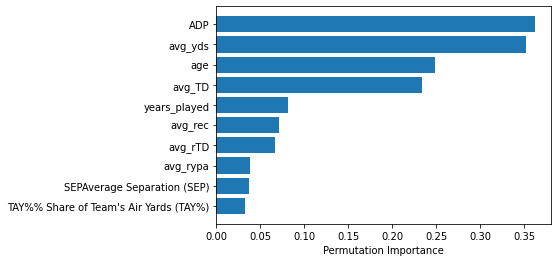

In [3]:
enetPPR_results = revised_run(X_train2022, X_test2022, 'wr', model_ = 'enet', pca=False)
enetPPR_results.head(50)

======= Fold 0 ========
Our accuracy on the validation set is 3.2666615144517186
======= Fold 1 ========
Our accuracy on the validation set is 3.7007708358747395
======= Fold 2 ========
Our accuracy on the validation set is 3.223576209161369
======= Fold 3 ========
Our accuracy on the validation set is 3.5921851029087195
======= Fold 4 ========
Our accuracy on the validation set is 4.0281547548242935
Overall accuracy: 3.5622696834441676
iteration 1: Dimensions = (89, 2)
iteration 2: Dimensions = (178, 2)
iteration 3: Dimensions = (267, 2)
iteration 4: Dimensions = (356, 2)
iteration 5: Dimensions = (445, 2)
Index(['name', 'proj fpts', 'rank'], dtype='object')


,name,proj fpts,rank,last rank
0,cooper-kupp,20.2328,1,23
1,jamarr-chase,19.7032,2,11
2,justin-jefferson,19.0348,3,1
3,tyreek-hill,18.9266,4,2
4,stefon-diggs,18.8466,5,4
5,aj-brown,18.5708,6,6
6,garrett-wilson,18.5516,7,21
7,amonra-stbrown,18.1772,8,7
8,ceedee-lamb,18.0444,9,5
9,deebo-samuel,18.0166,10,38


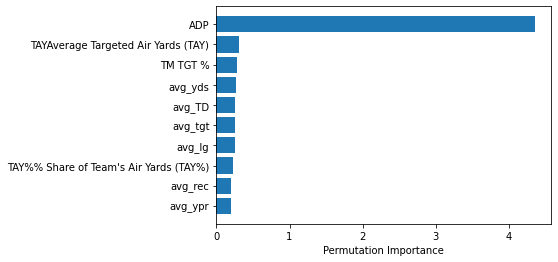

In [4]:
rfPPR_results = revised_run(X_train2022, X_test2022, 'wr', model_ = 'rf', pca=False)
rfPPR_results.head(50)

In [5]:
svrPPR_results = revised_run(X_train2022, X_test2022, 'wr', model_ = 'svr')
svrPPR_results.head(50)

======= Fold 0 ========
Our accuracy on the validation set is 3.497488603278039
======= Fold 1 ========
Our accuracy on the validation set is 3.656591215992695
======= Fold 2 ========
Our accuracy on the validation set is 3.461912867484557
======= Fold 3 ========
Our accuracy on the validation set is 3.637866415347327
======= Fold 4 ========
Our accuracy on the validation set is 4.027534985909968
Overall accuracy: 3.656278817602517
iteration 1: Dimensions = (89, 2)
iteration 2: Dimensions = (178, 2)
iteration 3: Dimensions = (267, 2)
iteration 4: Dimensions = (356, 2)
iteration 5: Dimensions = (445, 2)
Index(['name', 'proj fpts', 'rank'], dtype='object')


,name,proj fpts,rank,last rank
0,justin-jefferson,18.046338,1,1
1,davante-adams,17.786355,2,3
2,ceedee-lamb,17.336034,3,5
3,amonra-stbrown,17.231006,4,7
4,aj-brown,17.029133,5,6
5,jamarr-chase,17.023491,6,11
6,tyreek-hill,16.961804,7,2
7,stefon-diggs,16.945105,8,4
8,cooper-kupp,16.504756,9,23
9,jaylen-waddle,15.750265,10,8


In [6]:
X_train2022, X_test2022 = train_test('wr', num_years=5, year_for=2022, scoring='HALF')
xgbHALF_results = revised_run(X_train2022, X_test2022, 'wr', year_for='2022', scoring='HALF')
xgbHALF_results.head(50)

======= Fold 0 ========
Our accuracy on the validation set is 2.9269687393315706
======= Fold 1 ========
Our accuracy on the validation set is 2.97244363199045
======= Fold 2 ========
Our accuracy on the validation set is 2.7697477100962953
======= Fold 3 ========
Our accuracy on the validation set is 3.107943416363754
======= Fold 4 ========
Our accuracy on the validation set is 2.909818043711245
Overall accuracy: 2.9373843082986624
iteration 1: Dimensions = (82, 2)
iteration 2: Dimensions = (164, 2)
iteration 3: Dimensions = (246, 2)
iteration 4: Dimensions = (328, 2)
iteration 5: Dimensions = (410, 2)
Index(['name', 'proj fpts', 'rank'], dtype='object')


,name,proj fpts,rank,last rank
0,jamarr-chase,14.518729,1,12
1,aj-brown,14.076639,2,5
2,ceedee-lamb,13.990306,3,6
3,amonra-stbrown,13.960268,4,8
4,davante-adams,13.893185,5,2
5,justin-jefferson,13.746701,6,1
6,cooper-kupp,13.688933,7,24
7,jaylen-waddle,13.557138,8,7
8,stefon-diggs,13.544417,9,4
9,tyreek-hill,12.975787,10,3


======= Fold 0 ========
Our accuracy on the validation set is 2.900851600881308
======= Fold 1 ========
Our accuracy on the validation set is 3.0396272176245054
======= Fold 2 ========
Our accuracy on the validation set is 2.7378239091088963
======= Fold 3 ========
Our accuracy on the validation set is 3.049279447785346
======= Fold 4 ========
Our accuracy on the validation set is 2.9126446070795446
Overall accuracy: 2.92804535649592
iteration 1: Dimensions = (82, 2)
iteration 2: Dimensions = (164, 2)
iteration 3: Dimensions = (246, 2)
iteration 4: Dimensions = (328, 2)
iteration 5: Dimensions = (410, 2)
Index(['name', 'proj fpts', 'rank'], dtype='object')


,name,proj fpts,rank,last rank
0,justin-jefferson,14.058289,1,1
1,jamarr-chase,13.983134,2,12
2,davante-adams,13.862542,3,2
3,aj-brown,13.650639,4,5
4,ceedee-lamb,13.642727,5,6
5,stefon-diggs,13.617757,6,4
6,tyreek-hill,13.547278,7,3
7,cooper-kupp,13.426997,8,24
8,jaylen-waddle,13.299471,9,7
9,amonra-stbrown,13.039862,10,8


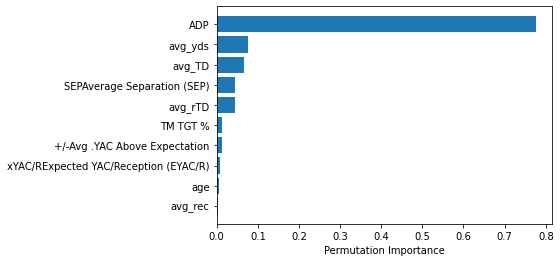

In [7]:
enetHALF_results = revised_run(X_train2022, X_test2022, 'wr', model_ = 'enet', pca=False, scoring='HALF')
enetHALF_results.head(50)

======= Fold 0 ========
Our accuracy on the validation set is 2.8050742657483485
======= Fold 1 ========
Our accuracy on the validation set is 2.783716768371315
======= Fold 2 ========
Our accuracy on the validation set is 3.056654505736928
======= Fold 3 ========
Our accuracy on the validation set is 2.9751189032326235
======= Fold 4 ========
Our accuracy on the validation set is 2.9396637721044314
Overall accuracy: 2.9120456430387294
iteration 1: Dimensions = (82, 2)
iteration 2: Dimensions = (164, 2)
iteration 3: Dimensions = (246, 2)
iteration 4: Dimensions = (328, 2)
iteration 5: Dimensions = (410, 2)
Index(['name', 'proj fpts', 'rank'], dtype='object')


,name,proj fpts,rank,last rank
0,cooper-kupp,17.7694,1,24
1,amonra-stbrown,17.6782,2,8
2,jamarr-chase,17.5324,3,12
3,deebo-samuel,17.3866,4,38
4,chris-godwin,17.2132,5,20
5,tyreek-hill,16.5232,6,3
6,ceedee-lamb,16.2826,7,6
7,stefon-diggs,15.9534,8,4
8,justin-jefferson,15.7922,9,1
9,aj-brown,15.4054,10,5


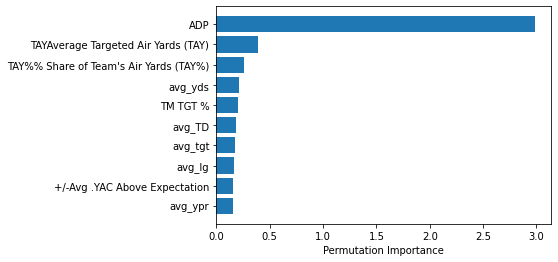

In [8]:
rfHALF_results = revised_run(X_train2022, X_test2022, 'wr', model_ = 'rf', pca=False, scoring='HALF')
rfHALF_results.head(50)

In [9]:
svrHALF_results = revised_run(X_train2022, X_test2022, 'wr', year_for='2022', model_='svr', scoring='HALF')
svrHALF_results.head(50)

======= Fold 0 ========
Our accuracy on the validation set is 2.831838507600147
======= Fold 1 ========
Our accuracy on the validation set is 3.1229730481908513
======= Fold 2 ========
Our accuracy on the validation set is 2.5319827906393817
======= Fold 3 ========
Our accuracy on the validation set is 3.148568332776925
======= Fold 4 ========
Our accuracy on the validation set is 3.033509135361577
Overall accuracy: 2.933774362913776
iteration 1: Dimensions = (82, 2)
iteration 2: Dimensions = (164, 2)
iteration 3: Dimensions = (246, 2)
iteration 4: Dimensions = (328, 2)
iteration 5: Dimensions = (410, 2)
Index(['name', 'proj fpts', 'rank'], dtype='object')


,name,proj fpts,rank,last rank
0,jamarr-chase,14.303932,1,12
1,amonra-stbrown,14.278700,2,8
2,ceedee-lamb,14.133427,3,6
3,justin-jefferson,14.052964,4,1
4,cooper-kupp,13.840500,5,24
5,davante-adams,13.669867,6,2
6,tyreek-hill,13.424388,7,3
7,stefon-diggs,13.399484,8,4
8,chris-olave,13.029140,9,25
9,dk-metcalf,12.955881,10,18


In [10]:
mean_results_PPR = xgbPPR_results.append([rfPPR_results, svrPPR_results, enetPPR_results], ignore_index = True)[['name', 'proj fpts']].groupby('name', as_index=False).mean().sort_values('proj fpts', ascending=False)
mean_results_PPR = mean_results_PPR.reset_index(drop=True)
mean_results_PPR['rank'] = mean_results_PPR.index + 1
mean_results_PPR.to_csv('projections/wr_PPR_2022_mean_projections.csv', index = False)
mean_results_PPR.head(50)

,name,proj fpts,rank
0,justin-jefferson,18.075088,1
1,jamarr-chase,17.865215,2
2,davante-adams,17.669241,3
3,aj-brown,17.512942,4
4,cooper-kupp,17.319819,5
5,stefon-diggs,17.296750,6
6,ceedee-lamb,17.274820,7
7,tyreek-hill,17.087828,8
8,amonra-stbrown,16.910563,9
9,jaylen-waddle,16.028241,10


In [11]:
summarize_proj('wr', '2022', 'PPR')

,name,rf proj,xgb proj,enet proj,svr proj,mean proj,rank,last rank
2,justin-jefferson,19.0348,17.254907,17.964308,18.046338,18.075088,1,1
1,jamarr-chase,19.7032,17.452065,17.282105,17.023491,17.865215,2,11
10,davante-adams,17.4672,17.645377,17.778033,17.786355,17.669241,3,3
5,aj-brown,18.5708,17.355949,17.095884,17.029133,17.512942,4,6
0,cooper-kupp,20.2328,16.522430,16.019288,16.504756,17.319819,5,23
...,...,...,...,...,...,...,...,...
88,noah-brown,3.4338,7.180420,7.585626,7.302536,6.375595,85,60
77,nelson-agholor,5.8110,6.269125,7.132203,6.074821,6.321787,86,88
79,randall-cobb,5.6338,6.052185,7.184019,5.642742,6.128187,87,86
87,nick-westbrook,4.3860,6.274626,6.746496,6.117965,5.881272,88,84


In [12]:
mean_results_HALF = xgbHALF_results.append([rfHALF_results, svrHALF_results, enetPPR_results], ignore_index = True)[['name', 'proj fpts']].groupby('name', as_index=False).mean().sort_values('proj fpts', ascending=False)
mean_results_HALF = mean_results_HALF.reset_index(drop=True)
mean_results_HALF['rank'] = mean_results_HALF.index + 1
mean_results_HALF.to_csv('projections/wr_HALF_2022_mean_projections.csv', index = False)
mean_results_HALF.head(50)

,name,proj fpts,rank
0,jamarr-chase,15.909291,1
1,amonra-stbrown,15.428479,2
2,justin-jefferson,15.389043,3
3,cooper-kupp,15.329530,4
4,ceedee-lamb,15.321616,5
5,stefon-diggs,14.901903,6
6,aj-brown,14.863092,7
7,tyreek-hill,14.862702,8
8,davante-adams,14.430371,9
9,jaylen-waddle,13.666144,10


In [13]:
summarize_proj('wr', '2022', 'HALF')

,name,rf proj,xgb proj,enet proj,svr proj,mean proj,rank,last rank
2,jamarr-chase,17.5324,14.518729,13.983134,14.303932,15.909291,1,12
1,amonra-stbrown,17.6782,13.960268,13.039862,14.278700,15.428479,2,8
8,justin-jefferson,15.7922,13.746701,14.058289,14.052964,15.389043,3,1
0,cooper-kupp,17.7694,13.688933,13.426997,13.840500,15.329530,4,24
6,ceedee-lamb,16.2826,13.990306,13.642727,14.133427,15.321616,5,6
...,...,...,...,...,...,...,...,...
78,marvin-jones,6.5400,4.334344,4.663726,5.398945,5.867524,84,55
60,quez-watkins,7.5690,3.757704,4.088610,5.175485,5.816022,85,77
81,trent-sherfield,5.9420,5.051790,5.398045,4.812835,5.796905,86,75
79,nelson-agholor,6.5302,4.080592,4.798086,4.120682,5.465919,88,81
